In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [6]:
TOP_LEVEL = "Dataset"
Emb_Dir = f"{TOP_LEVEL}/Embossed"
Pro_Dir = f"{TOP_LEVEL}/Province"
Reg_Dir = f"{TOP_LEVEL}/Regional"

emb = os.listdir(Emb_Dir)
pro = os.listdir(Pro_Dir)
reg = os.listdir(Reg_Dir)

(-0.5, 3071.5, 4079.5, -0.5)

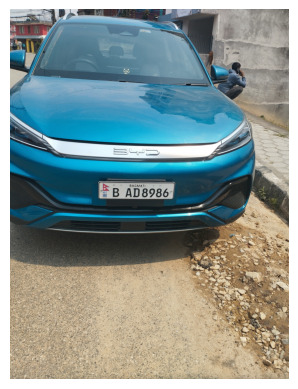

In [127]:
img = cv.imread(f"{Emb_Dir}/{emb[1]}")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis(False)

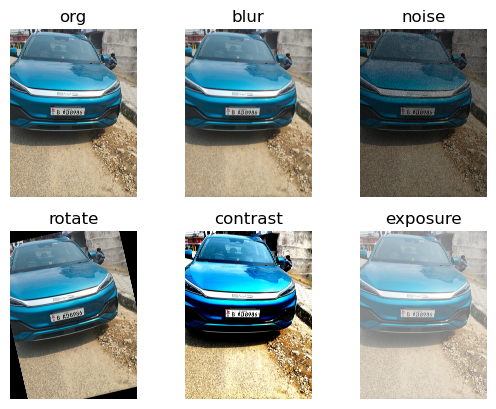

In [128]:
def blur(img:np.ndarray)->np.ndarray:
    k = random.randint(15,25)
    return cv.blur(img, ksize=(k,k))

def noise(img:np.ndarray)->np.ndarray:
    row, col, _ = img.shape
    salt = np.random.rand(row, col) < 0.3
    pepper = np.random.rand(row, col) < 0.3
    noisy_image = np.copy(img)
    noisy_image[salt] = 1
    noisy_image[pepper] = 0
    return noisy_image

def rotate(img:np.ndarray)->np.ndarray:
    angle = random.randint(5,15)
    image_center = tuple(np.array(img.shape[1::-1]) / 2)
    rot_mat = cv.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv.warpAffine(img, rot_mat, img.shape[1::-1], flags=cv.INTER_LINEAR)
    return result

def contrast(img:np.ndarray)->np.ndarray:
    cont = random.randint(30,100)
    f = float(131 * (cont + 127)) / (127 * (131 - cont))
    alpha_c = f
    gamma_c = 127*(1-f)
    return cv.addWeighted(img, alpha_c, img, 0, gamma_c)

def exposure(img:np.ndarray)->np.ndarray:
    brightness = random.randint(-200, 150)
    if brightness > 0:
            shadow = brightness
            highlight = 255
    else:
        shadow = 0
        highlight = 255 + brightness
    alpha_b = (highlight - shadow)/255
    gamma_b = shadow

    return cv.addWeighted(img, alpha_b, img, 0, gamma_b)

images = [
    (1,"org",img),
    (2,"blur", blur(img)),
    (3,"noise", noise(img)),
    (4,"rotate", rotate(img)),
    (5,"contrast", contrast(img)),
    (6,"exposure", exposure(img))
]

for i, label, image in images:
    plt.subplot(2,3,i)
    plt.title(label)
    plt.axis(False)
    plt.imshow(image)

plt.show()

